# Week 12 Capstone project

First let's load some important libraries that will help us through this notebook, to make data preparation, data cleaning, the exploratory data anlysis, model selection and parameter tuning.

First the basic libraries for numerical processing

In [1]:
import numpy as np
import pandas as pd

Then some libraries for make some plots

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

The following libraries are the proposed models

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

This one's helps to preprocess the data to the models

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import cross_val_predict

Finally the following libraries will help us with the metrics

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mutual_info_score

The following librarie is usefull for times and preprocessing

In [6]:
from tqdm.auto import tqdm

## 1.- Flight price prediction dataset

The data is taken from Kaggle in the following link [Flight Price Prediction](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction), and can also be obtatined with the following link

In [7]:
#data = 'https://raw.githubusercontent.com/FranciscoOrtizTena/ML_Zoomcamp/main/12_week_capstone_project/flight_price_prediction.csv'

In [8]:
#!wget $data

In [9]:
df = pd.read_csv('data/flight_price_prediction.csv').set_index('ID')

In [10]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
ID,,,,,,,,,,,
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [11]:
df.shape

(300153, 11)

## 2.- Data preparation and data cleaning

It's seems that the columns names are already standardized without spaces and lowercase,

Now let's check for the data type in each column

In [12]:
df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

The feature flight is already contained in the airline, so for this problem let's drop the feature, since it does not apport much to the price of the flight

In [13]:
df = df.drop(['flight'], axis=1)

The data set contains 8 categorical features and 2 numerical features, remember that the target is the price, which is a continuous value.

In [14]:
numerical_columns = ['duration', 'days_left', 'price']
categorical_columns = ['airline', 'source_city', 'departure_time', 
                       'stops', 'arrival_time', 'destination_city', 'class']

The data inside the rows has upper and lowercase, let's standardize everything into lowercase

In [15]:
for i in categorical_columns:
    df[i] = df[i].str.lower()

Finally let's review is there some non null values in the data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 25.2+ MB


In [17]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
ID,,,,,,,,,,
0,spicejet,delhi,evening,zero,night,mumbai,economy,2.17,1,5953
1,spicejet,delhi,early_morning,zero,morning,mumbai,economy,2.33,1,5953
2,airasia,delhi,early_morning,zero,early_morning,mumbai,economy,2.17,1,5956
3,vistara,delhi,morning,zero,afternoon,mumbai,economy,2.25,1,5955
4,vistara,delhi,morning,zero,morning,mumbai,economy,2.33,1,5955


## 3.- Exploratory Data Analysis (EDA)

First let's review the categorical values taking a look of each feature

In [18]:
print(df.airline.value_counts(),'\n')
print(df.source_city.value_counts(), '\n')
print(df.departure_time.value_counts(), '\n')
print(df.stops.value_counts(), '\n')
print(df.arrival_time.value_counts(), '\n')
print(df.destination_city.value_counts(), '\n')
print(df['class'].value_counts(), '\n')

vistara      127859
air_india     80892
indigo        43120
go_first      23173
airasia       16098
spicejet       9011
Name: airline, dtype: int64 

delhi        61343
mumbai       60896
bangalore    52061
kolkata      46347
hyderabad    40806
chennai      38700
Name: source_city, dtype: int64 

morning          71146
early_morning    66790
evening          65102
night            48015
afternoon        47794
late_night        1306
Name: departure_time, dtype: int64 

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64 

night            91538
evening          78323
morning          62735
afternoon        38139
early_morning    15417
late_night       14001
Name: arrival_time, dtype: int64 

mumbai       59097
delhi        57360
bangalore    51068
kolkata      49534
hyderabad    42726
chennai      40368
Name: destination_city, dtype: int64 

economy     206666
business     93487
Name: class, dtype: int64 



Now let's make some graphs to visualize the categoric features 

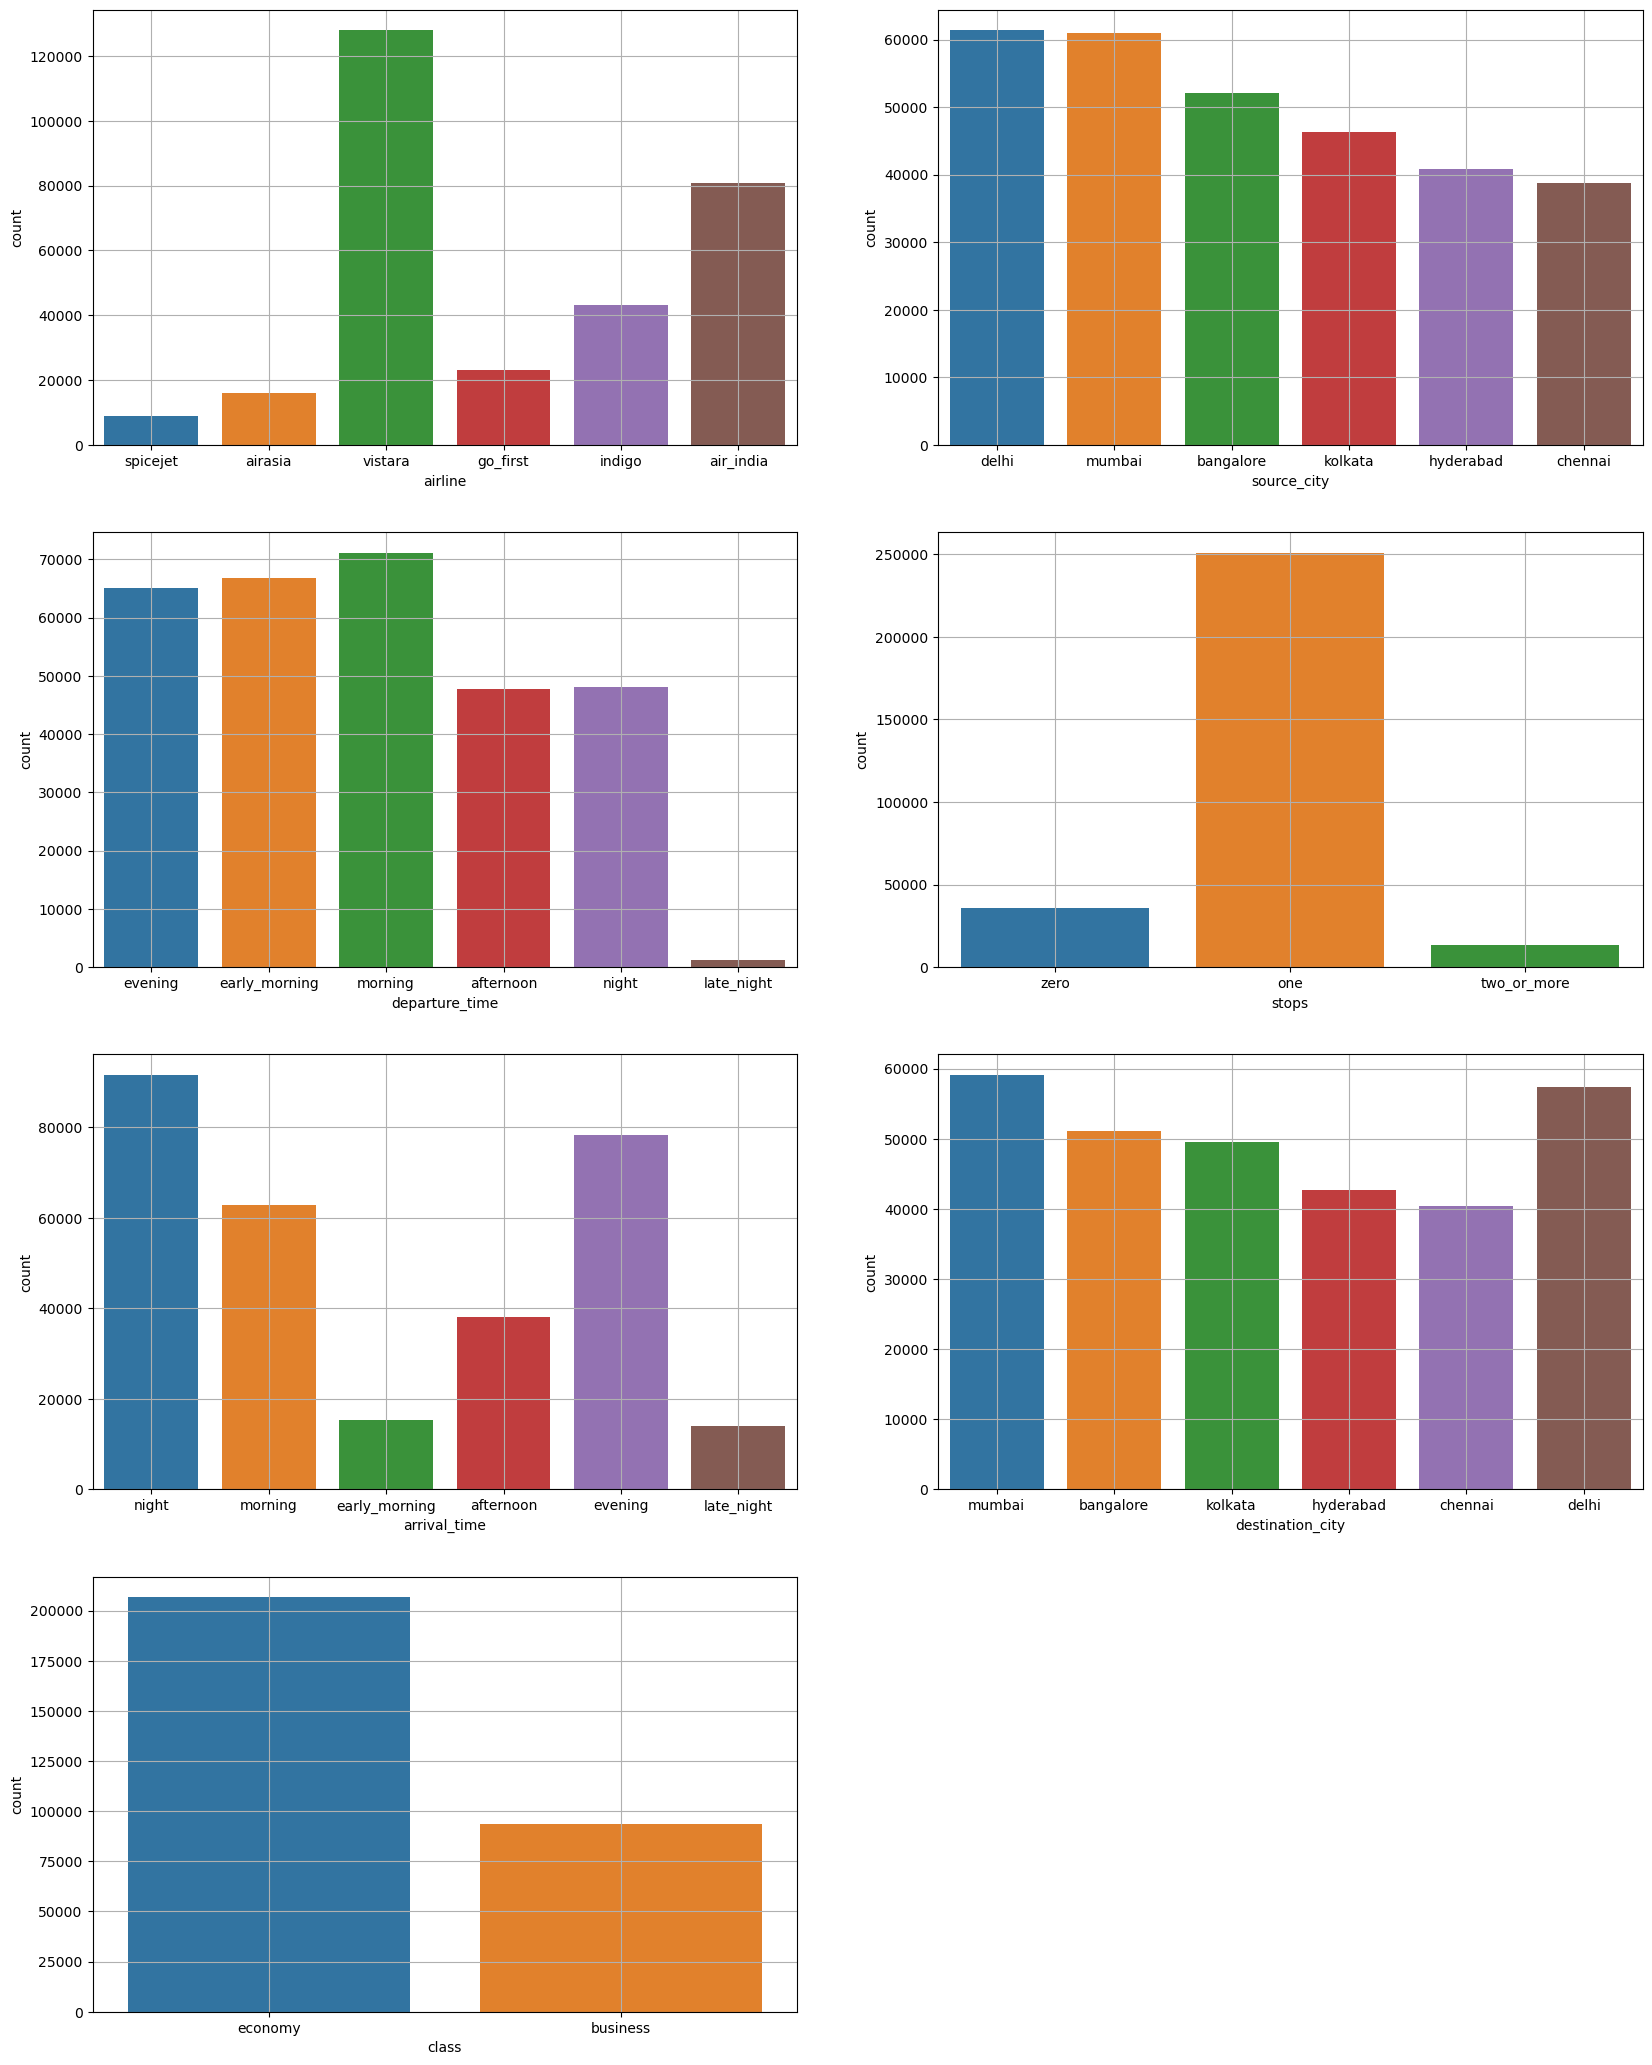

In [19]:
ax = plt.figure(figsize=(20,26))

for i, j in enumerate(categorical_columns):
    ax = plt.subplot(4, 2, i+1)
    ax = sns.countplot(x=j, data=df)
    ax.grid(True)

The plots shows us the following:
- The airline with more flights is 'Vistara'
- The most frequent source_city is 'Delhi'
- The most flights occur in the 'morning'
- Most of the flights has 'one_stop'
- The most frequent arrival time is the 'night'
- The most frequent destination_city is Mumbai
- The passengers flight more in economy

And for the numerical values, let's check the info and create some histograms

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


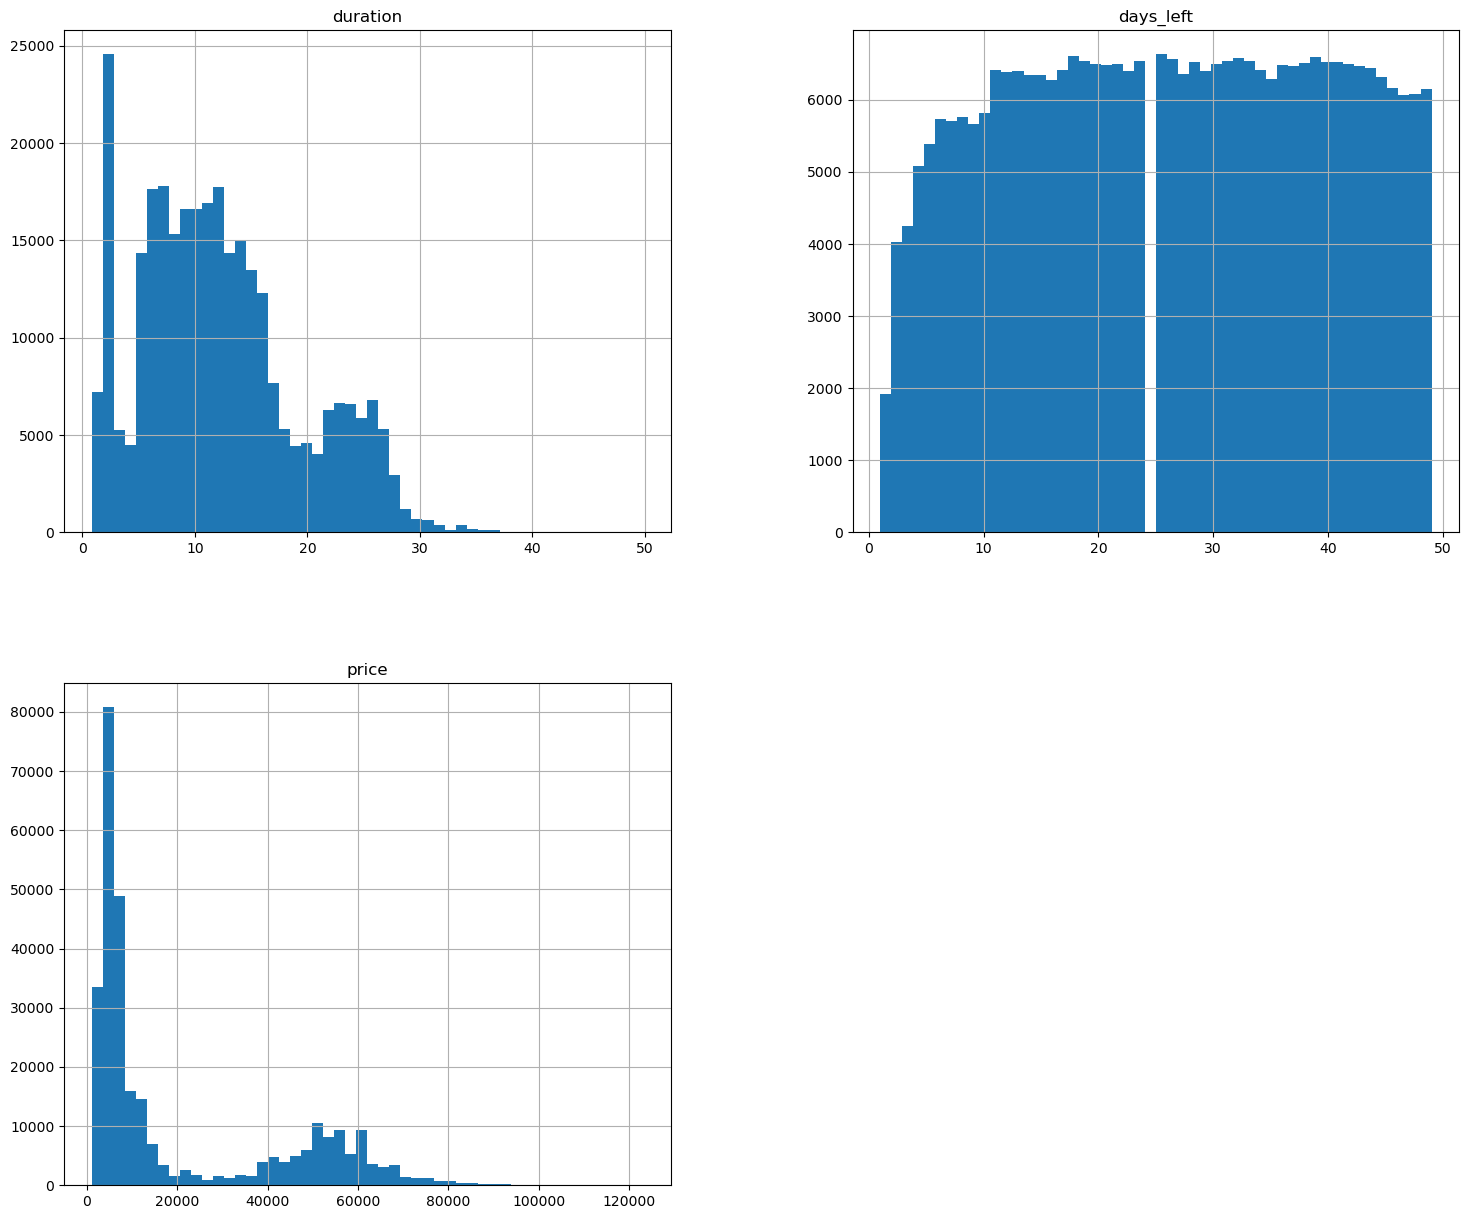

In [21]:
df.hist(bins=50, figsize=(18, 15))
plt.show()

And some boxplots

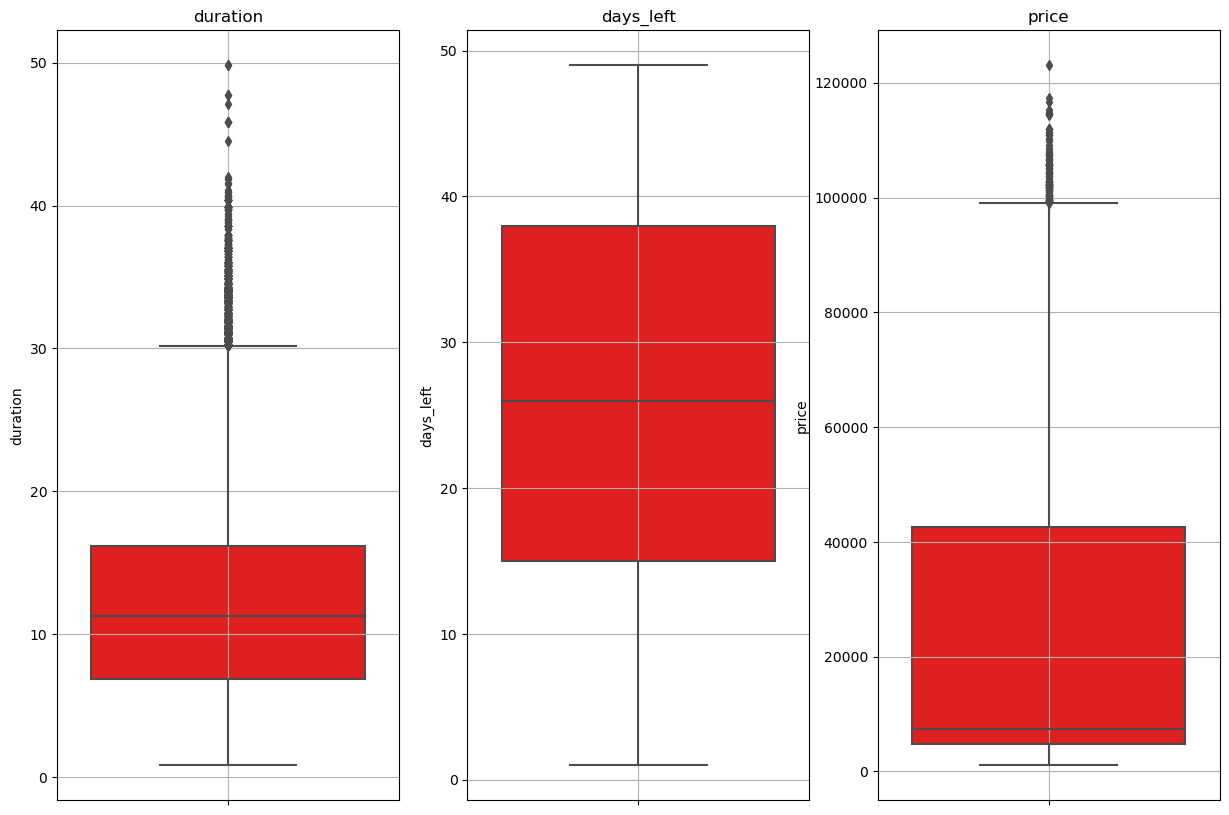

In [22]:
ax = plt.figure(figsize=(15,10))
for i, j in enumerate(numerical_columns):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[j], data=df, color='red')
    plt.title(j)
    plt.grid(True)

We can see that the average duration of the flights is 11 hours, the tickets are bought around 27 days in advanced and the mean price is 15,000.

Let's make an analysis of the prices of the flight with the categorical features:

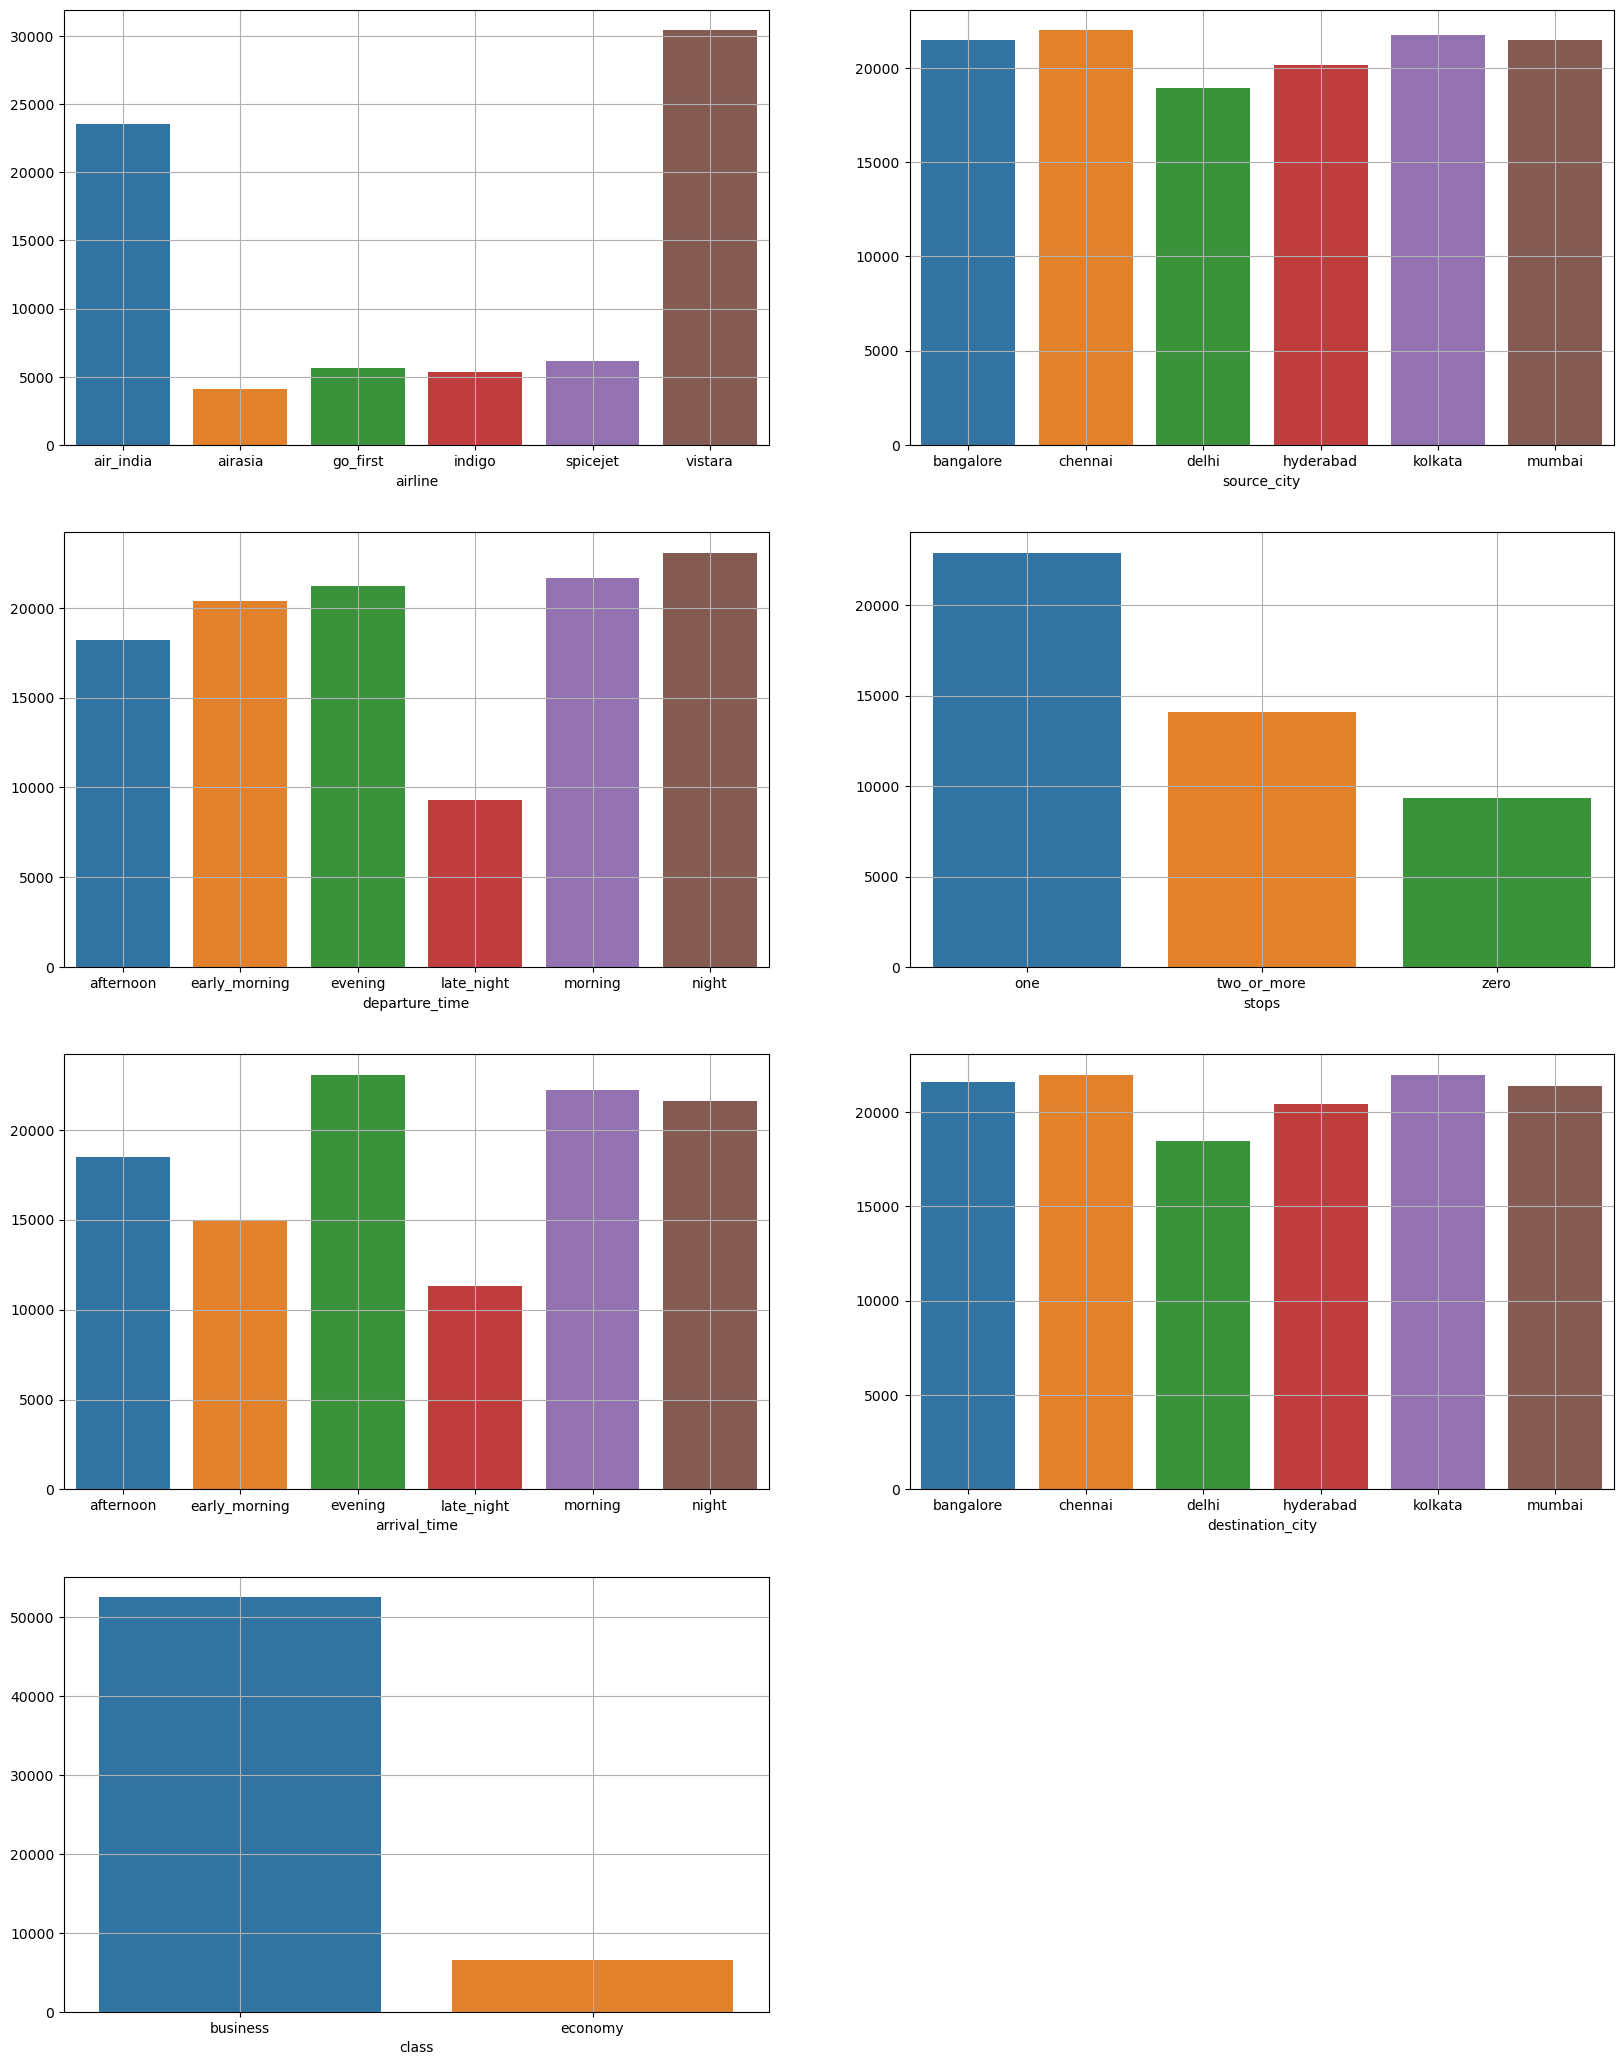

In [23]:
ax = plt.figure(figsize=(20,26))

for i, j in enumerate(categorical_columns):
    plt.subplot(4, 2, i+1)
    sns.barplot(x=df.groupby(j).agg({'price': 'mean'}).index, y=np.array(df.groupby(j).agg({'price': 'mean'})['price']))
    plt.grid(True)
plt.show()

Let's make a review of the costly and cheapers flights:
- For the airline, the costlier is Vistara and the cheaper is airasia
- For the source_city, the costlier is chennai and the cheaper is delhi
- For the departure_time, the costlier is at night and the cheaper is late_night
- For the stops, the costlier is with one and the cheaper is with zero
- For the arrival_time, the costlier is at evening and the cheaper is at late night
- For the destination_city, the costlier is Kolkata and the cheaper is dehli
- Is costlier traveling in business than economy

Finally, let's review some mutual information of the categorical values

In [24]:
def mutual_info_price(series):
    return mutual_info_score(series, df.price)

mi = df[categorical_columns].apply(mutual_info_price)
mi.sort_values(ascending=False)

source_city         1.637161
destination_city    1.523237
airline             1.171473
class               0.619977
arrival_time        0.527595
departure_time      0.444583
stops               0.420556
dtype: float64

The feature that has more correlation is the source_city

## 4.- Model selection process and parameter tuning

For this Regression problem, the Linear Regression, Decision Trees Regressor, Random Forest Regressor and XGBoost are proposed models to predict the price of the flight

### 4.1.- Setting up the validation framework

Before creating the train, validation and test sets let's change the stops and class categorical features into a numerical features according to the value

In [25]:
df.stops = df.stops.replace({'zero': 0,
                             'one': 1,
                             'two_or_more': 2})
df['class'] = df['class'].replace({'economy': 0,
                                   'business': 1})

First let's create the train/validation/test splitting the entire dataset into 60%/20%/20%, specifying the seed for reproducibility of the results

In [26]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=7)
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=7)

Reseting the index

In [27]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Finally let's pass the prediction values and drop them from the dataframes

In [28]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

### 4.2.- Preprocessing

First we are going to make a one-hot encode for the features, especially the categorical values like 'airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city'

In [29]:
df.dtypes

airline              object
source_city          object
departure_time       object
stops                 int64
arrival_time         object
destination_city     object
class                 int64
duration            float64
days_left             int64
price                 int64
dtype: object

In [30]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

### 4.3.- Linear Regression

First let's train a linear regression model

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Now making predictions

In [32]:
y_pred = lr.predict(X_val)

Finally lets calculate the metric of mean_squared_error and the $r^2$

In [33]:
lr_rmse = np.round(np.sqrt(mean_squared_error(y_val, y_pred)), 2)
lr_r2 = np.round(r2_score(y_val, y_pred) * 100, 2)

In [34]:
print(f'The Linear Regressor has a rmse of {lr_rmse} and a r2= {lr_r2}')

The Linear Regressor has a rmse of 6797.35 and a r2= 91.08


It seems a good start, but the mean error is a little high of 6797.35, but with a good $r^2$ above 90 which indicates that the model describe pretty well the prediction

### 4.3.1.- Linear Regression Parameter tuning

For parameter tuning in LinearRegression is using the Ridge regression, which minimizes the function $||y - Xw||^2_2 + \alpha * ||w||^2_2$, and the Lasso regression which minimizes the function $(\frac{1}{2 \times n_{samples}}) \times ||y - Xw||^2_2 + \alpha * ||w||_1$

### Ridge

The parameter that can be fit in Ridge is the alpha value, here let's tuning for the following values

(0.001, 0.01, 0.1, 0.5, 1, 5, 10, 15, 20)

In [35]:
for a in (0.001, 0.01, 0.1, 0.5, 1, 5, 10, 15, 20):
    lr_r = Ridge(alpha=a)
    lr_r.fit(X_train, y_train)
    y_pred = lr_r.predict(X_val)
    lr_r_rmse = np.round(np.sqrt(mean_squared_error(y_val, y_pred)), 2)
    lr_r_r2 = np.round(r2_score(y_val, y_pred) * 100, 2)
    print('%7s -> rmse=%7s -> r2=%s' %(a, lr_r_rmse, lr_r_r2))

  0.001 -> rmse=6797.33 -> r2=91.08
   0.01 -> rmse=6797.33 -> r2=91.08
    0.1 -> rmse=6797.33 -> r2=91.08
    0.5 -> rmse=6797.33 -> r2=91.08
      1 -> rmse=6797.33 -> r2=91.08
      5 -> rmse=6797.33 -> r2=91.08
     10 -> rmse=6797.34 -> r2=91.08
     15 -> rmse=6797.35 -> r2=91.08
     20 -> rmse=6797.36 -> r2=91.08


It seems that we had the same value as before, so the Ridge does not improve the model

### Lasso

The same for Lasso we will adjust the alpha value between the following values

(0.001, 0.01, 0.1, 0.5, 1, 5, 10, 15, 20)

In [36]:
for a in (0.001, 0.01, 0.1, 0.5, 1, 5, 10, 15, 20):
    lr_l = Lasso(alpha=a)
    lr_l.fit(X_train, y_train)
    y_pred = lr_l.predict(X_val)
    lr_l_rmse = np.round(np.sqrt(mean_squared_error(y_val, y_pred)), 2)
    lr_l_r2 = np.round(r2_score(y_val, y_pred) * 100, 2)
    print('%7s -> rmse=%7s -> r2=%s' %(a, lr_l_rmse, lr_l_r2))

C:\Users\10714681\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.738e+11, tolerance: 9.873e+09
  model = cd_fast.enet_coordinate_descent(


  0.001 -> rmse=6797.33 -> r2=91.08


C:\Users\10714681\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.233e+11, tolerance: 9.873e+09
  model = cd_fast.enet_coordinate_descent(


   0.01 -> rmse=6797.33 -> r2=91.08


C:\Users\10714681\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.908e+10, tolerance: 9.873e+09
  model = cd_fast.enet_coordinate_descent(


    0.1 -> rmse=6797.33 -> r2=91.08
    0.5 -> rmse=6797.35 -> r2=91.08
      1 -> rmse= 6797.4 -> r2=91.08
      5 -> rmse=6798.43 -> r2=91.07
     10 -> rmse=6800.42 -> r2=91.07
     15 -> rmse=6802.97 -> r2=91.06
     20 -> rmse=6805.83 -> r2=91.05


It does not improve the model, so let's try another model the Decision Tree Regressor

### 4.4.- Decision Tree Regressor

Let's first create the model

In [37]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

Now making the predictions

In [38]:
y_pred = dt.predict(X_val)
dt_rmse = np.round(np.sqrt(mean_squared_error(y_val, y_pred)), 2)
dt_r2 = np.round(r2_score(y_val, y_pred) * 100, 2)

And obtaining the metrics

In [39]:
print(f'The Decision Tree Regressor has an rmse of {dt_rmse} and a r2= {dt_r2}')

The Decision Tree Regressor has an rmse of 3550.75 and a r2= 97.56


The model improve so much, now we have a mean error of 3544.59, with an $r^2$ of 97.57%, let's tune some parameters for the model

### 4.4.1.- Decision Tree Regressor parameter tuning

Let's start with the max_depth

In [40]:
depths = [5, 10, 15, 20, 30, 40, 50, None]
for d in depths:
    dt = DecisionTreeRegressor(max_depth=d)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_val)
    dt_rmse = np.round(np.sqrt(mean_squared_error(y_val, y_pred)), 2)
    dt_r2 = np.round(r2_score(y_val, y_pred) * 100, 2)
    print('%4s -> rmse=%7s -> r2=%s' %(d, dt_rmse, dt_r2))

   5 -> rmse=5427.98 -> r2=94.31
  10 -> rmse=4523.37 -> r2=96.05
  15 -> rmse=3819.52 -> r2=97.18
  20 -> rmse= 3450.7 -> r2=97.7
  30 -> rmse= 3532.4 -> r2=97.59
  40 -> rmse=3532.42 -> r2=97.59
  50 -> rmse=3545.64 -> r2=97.57
None -> rmse=3554.67 -> r2=97.56


Zomming into 20

In [41]:
depths = [15, 17, 19, 20, 21, 22, 25]
for d in depths:
    dt = DecisionTreeRegressor(max_depth=d)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_val)
    dt_rmse = np.round(np.sqrt(mean_squared_error(y_val, y_pred)), 2)
    dt_r2 = np.round(r2_score(y_val, y_pred) * 100, 2)
    print('%4s -> rmse=%7s -> r2=%s' %(d, dt_rmse, dt_r2))

  15 -> rmse=3822.01 -> r2=97.18
  17 -> rmse=3627.83 -> r2=97.46
  19 -> rmse=3494.32 -> r2=97.64
  20 -> rmse=3463.25 -> r2=97.68
  21 -> rmse=3413.01 -> r2=97.75
  22 -> rmse=3432.11 -> r2=97.72
  25 -> rmse=3469.41 -> r2=97.67


The best metrics is obtained with a max_depth = 21

Now let's move to the min_sample_leaf

In [42]:
scores = []
for d in [15, 20, 21, 22, 25]:
    for s in [1, 5, 10, 15, 20, 50]:
        dt = DecisionTreeRegressor(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        
        y_pred = dt.predict(X_val)
        dt_rmse = np.round(np.sqrt(mean_squared_error(y_val, y_pred)), 2)
        dt_r2 = np.round(r2_score(y_val, y_pred) * 100, 2)
        
        scores.append((d, s, dt_rmse, dt_r2))
        
columns = ['max_depth', 'min_samples_leaf', 'rmse', 'r2']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['r2']).round(3)
df_scores_pivot

r2                            
max_depth            15     20     21     22     25
min_samples_leaf                                   
1                 97.18  97.69  97.71  97.73  97.65
5                 97.30  98.07  98.14  98.18  98.24
10                97.27  98.05  98.13  98.16  98.22
15                97.28  98.02  98.10  98.12  98.19
20                97.26  97.97  98.04  98.06  98.13
50                96.95  97.32  97.34  97.34  97.37

<function matplotlib.pyplot.show(close=None, block=None)>

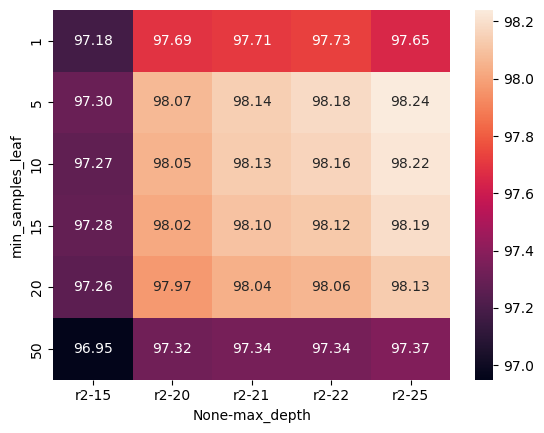

In [43]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.2f')
plt.show

It seems that the beast combination goes ahead of 21, so after some reviews the best combination is:

In [44]:
scores = []
for d in [21, 25, 27, 30, 32]:
    for s in [1, 5, 10, 15, 20]:
        dt = DecisionTreeRegressor(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        
        y_pred = dt.predict(X_val)
        dt_rmse = np.round(np.sqrt(mean_squared_error(y_val, y_pred)), 2)
        dt_r2 = np.round(r2_score(y_val, y_pred) * 100, 2)
        
        scores.append((d, s, dt_rmse, dt_r2))
        
columns = ['max_depth', 'min_samples_leaf', 'rmse', 'r2']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['r2']).round(3)
df_scores_pivot

r2                            
max_depth            21     25     27     30     32
min_samples_leaf                                   
1                 97.73  97.67  97.62  97.59  97.59
5                 98.14  98.24  98.26  98.27  98.27
10                98.13  98.22  98.24  98.26  98.26
15                98.10  98.19  98.21  98.23  98.22
20                98.04  98.13  98.14  98.16  98.16

<function matplotlib.pyplot.show(close=None, block=None)>

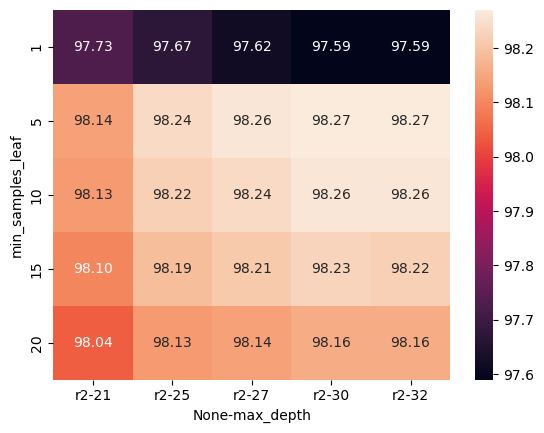

In [45]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.2f')
plt.show

The model does not improve ahead of 98.27, so the best combination is min_samples_leaf=5 with a max_depth=30. Let's move into the next model

### 4.5.- Random Forest

In [46]:
scores = []
for n in tqdm(range(10, 201, 10)):
    rf = RandomForestRegressor(n_estimators=n, random_state=7, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    rf_rmse = np.round(np.sqrt(mean_squared_error(y_val, y_pred)), 2)
    rf_r2 = np.round(r2_score(y_val, y_pred) * 100, 2)
    
    scores.append((n, rf_rmse, rf_r2))
    
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse', 'r2'])

  0%|          | 0/20 [00:00<?, ?it/s]

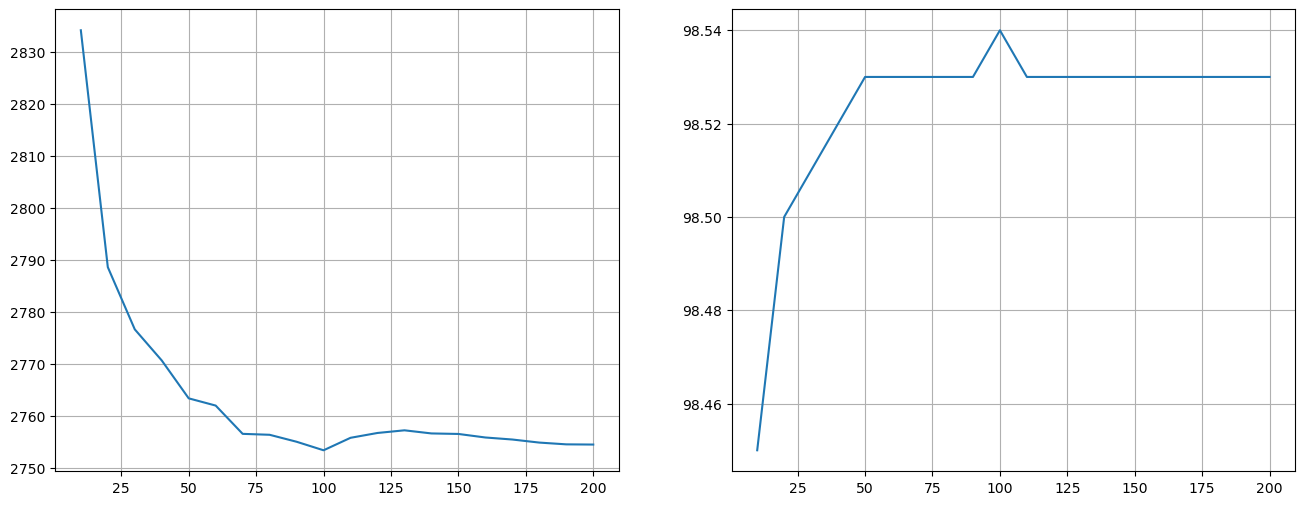

In [47]:
ax = plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.plot(df_scores.n_estimators, df_scores.rmse)
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(df_scores.n_estimators, df_scores.r2)
plt.grid(True)

We have a best rmse and r2 at 75 n_estimators, now let's move into the the hyperparameters

### 4.5.1.- Random Forest Regressor parameter tuning

First let's tune the max_depth

In [48]:
scores = []
for d in tqdm([15, 20, 25, 30]):
    for n in range(50, 101, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                   max_depth=d,
                                   random_state=7,
                                   n_jobs=-1)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict(X_val)
        rf_rmse = np.round(np.sqrt(mean_squared_error(y_val, y_pred)), 2)
        rf_r2 = np.round(r2_score(y_val, y_pred) * 100, 2)
        scores.append((d, n, rf_rmse, rf_r2))

df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'rmse', 'r2'])

  0%|          | 0/4 [00:00<?, ?it/s]

[]

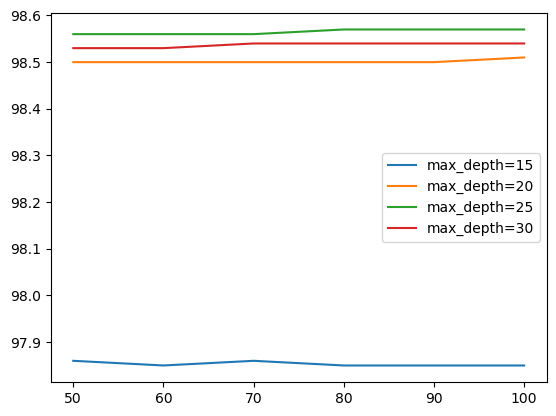

In [49]:
for d in [15, 20, 25, 30]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.r2, label='max_depth=%d' % d)
    
plt.legend()
plt.plot()

The max_depth is obtained with 25

Now moving into min_sample_leaf

In [50]:
max_depth = 25

In [51]:
scores = []
for s in tqdm([1, 3, 5, 7]):
    for n in range(50, 101, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                   max_depth=max_depth,
                                   min_samples_leaf=s,
                                   random_state=7,
                                   n_jobs=-1)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict(X_val)
        rf_rmse = np.round(np.sqrt(mean_squared_error(y_val, y_pred)), 2)
        rf_r2 = np.round(r2_score(y_val, y_pred) * 100, 2)
        scores.append((s, n, rf_rmse, rf_r2))

df_scores = pd.DataFrame(scores, columns=['min_samples_leaf', 'n_estimators', 'rmse', 'r2'])

  0%|          | 0/4 [00:00<?, ?it/s]

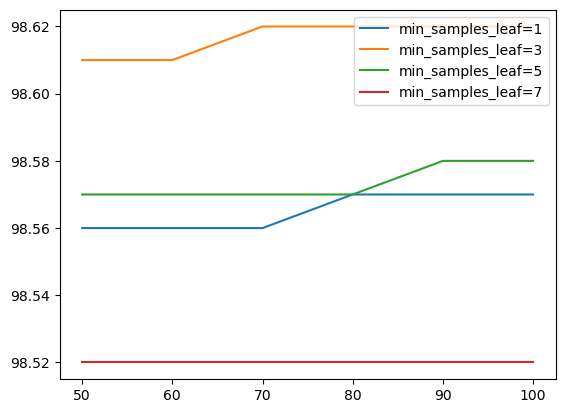

In [52]:
for s in [1, 3, 5, 7]:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.r2, label='min_samples_leaf=%s' % s)

plt.legend()
plt.show()

The best model is obtained with min_samples_leaf=5

In [53]:
min_samples_leaf = 5

In [54]:
rf = RandomForestRegressor(n_estimators=75,
                           max_depth=max_depth,
                           min_samples_leaf=min_samples_leaf,
                           random_state=7)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, min_samples_leaf=5, n_estimators=75,
                      random_state=7)

In [55]:
y_pred = rf.predict(X_val)
rf_rmse = np.round(np.sqrt(mean_squared_error(y_val, y_pred)), 2)
rf_r2 = np.round(r2_score(y_val, y_pred) * 100, 2)

In [57]:
print(f'The Random Forest Regressor tuned has an rmse of {rf_rmse} and a r2= {rf_r2}')

The Random Forest Regressor tuned has an rmse of 2716.76 and a r2= 98.57


### 4.6.- XGBoost

The following def will help to threat the output of the XGBoost model

In [58]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

Finally let's train an XGBoost model and review it's performance. First let's create the train and val set

In [59]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

Now the watchlist and the parameters for the XGBoost model

In [60]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [61]:
%%capture output
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',

    'nthread': 8,
    'seed': 7,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=2,
                  evals=watchlist)

Now let's look at the best num_boost_round parameter

In [62]:
df_score = parse_xgb_output(output)

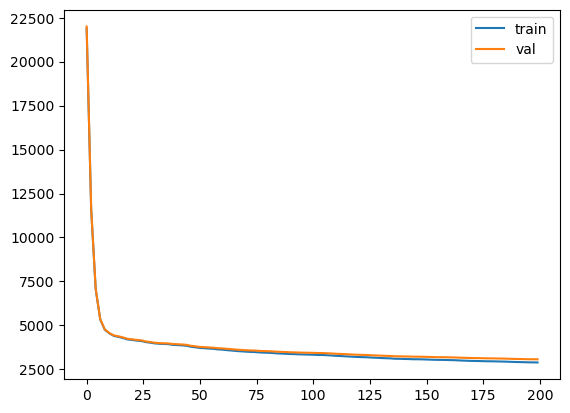

In [63]:
plt.plot(df_score.num_iter, df_score.train_rmse, label='train')
plt.plot(df_score.num_iter, df_score.val_rmse, label='val')
plt.legend()

In [64]:
df_score[df_score.val_rmse == df_score.val_rmse.min()]

,num_iter,train_rmse,val_rmse
100,199,2889.13538,3069.4564


It seems that XGBoost does not perform well as Random Forest Regressor, let's tune some parameters

### 4.6.1.- First lets tune the eta

We will tune the model for eta = [0.01, 0.05, 0.1, 0.3, 1.0]

In [65]:
scores = {}

In [78]:
%%capture output
xgb_params = {
    'eta': 1.0, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',

    'nthread': 8,
    'seed': 7,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=2,
                  evals=watchlist)

In [79]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [80]:
scores.keys()

dict_keys(['eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=1.0'])

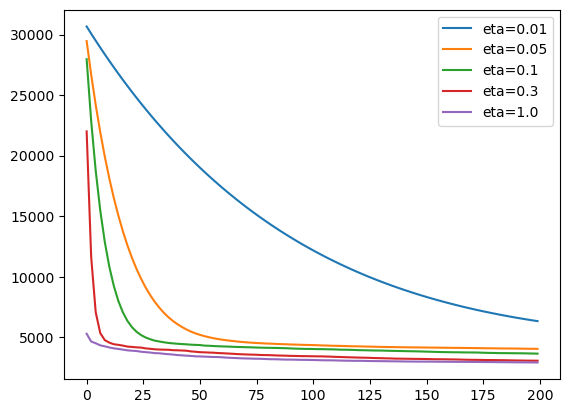

In [81]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=key)
plt.legend()
plt.show()

The best model is with eta=1.0, lets move onto max_depth

### 4.6.2.- Tune the max_depth

Now let's vary max_depth = [3, 4, 6, 10]

In [82]:
scores = {}

In [92]:
%%capture output
xgb_params = {
    'eta': 1.0, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',

    'nthread': 8,
    'seed': 7,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=2,
                  evals=watchlist)

In [93]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

In [94]:
scores.keys()

dict_keys(['max_depth=3', 'max_depth=4', 'max_depth=6', 'max_depth=10'])

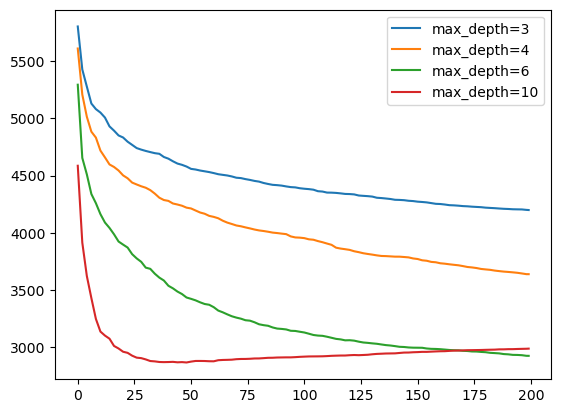

In [95]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=max_depth)
plt.legend()
plt.show()

In [96]:
scores['max_depth=10'][scores['max_depth=10'].val_rmse == scores['max_depth=10'].val_rmse.min()]

,num_iter,train_rmse,val_rmse
24,48,1687.41974,2865.21796


It is a little worse than the Random Forest Regressor, let's tune finally the min_child_weight

### 4.6.3- Tune the min_child_weight

I proposed the following min_child_weight = [1, 10, 30]

In [97]:
scores = {}

In [104]:
%%capture output
xgb_params = {
    'eta': 1.0, 
    'max_depth': 10,
    'min_child_weight': 30,
    
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',

    'nthread': 8,
    'seed': 7,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=2,
                  evals=watchlist)

In [105]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

In [106]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=30'])

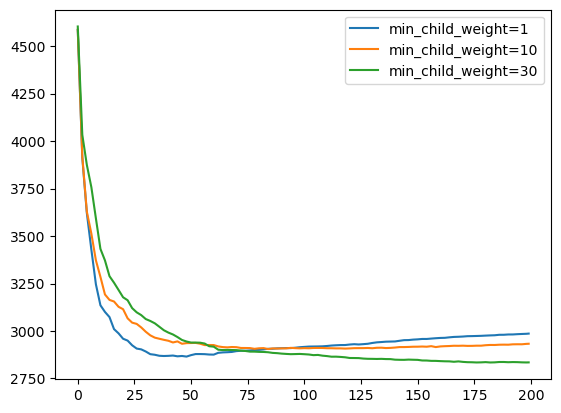

In [107]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=min_child_weight)
plt.legend()
plt.show()

It seems that when the min_child_weight=30 gets better above num_iter > 200, but the computational cost is high so let's use the min_child_weight=1

In [108]:
scores['min_child_weight=1'][scores['min_child_weight=1'].val_rmse == scores['min_child_weight=1'].val_rmse.min()]

,num_iter,train_rmse,val_rmse
24,48,1687.41974,2865.21796


It's the same value as the one adjusting the max_depth. 

So the final XGBoost model contain the following params
- eta = 1.0
- max_depth = 10
- min_child_weight = 1
- num_iter=48

In [109]:
xgb_params = {
    'eta': 1.0, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',

    'nthread': 8,
    'seed': 7,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=48)

In [110]:
y_pred = model.predict(dval)

In [111]:
xgb_rmse = np.round(np.sqrt(mean_squared_error(y_val, y_pred)), 2)
xgb_r2 = np.round(r2_score(y_val, y_pred) * 100, 2)

In [112]:
print(f'The XGBoost model tuned has a rmse of {xgb_rmse} and a r2= {xgb_r2}')

The XGBoost model tuned has a rmse of 2867.45 and a r2= 98.41


## 5.- Selecting the final model

Finally let's compare the four models and choose the best one

### 5.1.- Linear Regression

The best model between LinearRegression, Ridge and Lasso, was the LinearRegression.

In [113]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [114]:
y_pred = lr.predict(X_val)
np.round(r2_score(y_val, y_pred) * 100, 2)

91.08

## 5.2.- Decision Tree

In [115]:
dt = DecisionTreeRegressor(max_depth=30, min_samples_leaf=5)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=30, min_samples_leaf=5)

In [117]:
y_pred = dt.predict(X_val)
np.round(r2_score(y_val, y_pred) * 100, 2)

98.27

### 5.3.- Random Forest

In [118]:
rf = RandomForestRegressor(n_estimators=75,
                           max_depth=25,
                           min_samples_leaf=5,
                           random_state=7)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, min_samples_leaf=5, n_estimators=75,
                      random_state=7)

In [119]:
y_pred = rf.predict(X_val)
np.round(r2_score(y_val, y_pred) * 100, 2)

98.57

### 5.4.- XGBoost

In [120]:
xgb_params = {
    'eta': 1.0, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',

    'nthread': 8,
    'seed': 7,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=48)

In [121]:
y_pred = model.predict(dval)
np.round(r2_score(y_val, y_pred) * 100, 2)

98.41

So the best model that can be achieved is the Random Fores Regression with a 98.57% of $r^2$

# 6.- Model testing

Finally let's evaluate the $r^2$ in the test set using the full train set

In [122]:
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = df_full_train.price.values

In [123]:
del df_full_train['price']

In [124]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [125]:
rf = RandomForestRegressor(n_estimators=75,
                           max_depth=25,
                           min_samples_leaf=5,
                           random_state=7)
rf.fit(X_full_train, y_full_train)

RandomForestRegressor(max_depth=25, min_samples_leaf=5, n_estimators=75,
                      random_state=7)

In [127]:
y_pred = rf.predict(X_test)
np.round(r2_score(y_test, y_pred) * 100, 2)

98.57